## <font color=Blue> Yotam Balbul </font>
### <font color=Black> FIFA (Soccer) Rankings </font>



# <font color=Black> The problem statement: </font>

* Analyze the trends and patterns in the FIFA men's international soccer rankings from August 1993 to April 2018, and investigate the factors contributing to a team's success or decline. This includes identifying the most consistent and inconsistent national teams, evaluating the strength and improvement of different confederations, and identifying national teams that have dominated or fallen off the rankings. The audience for this dataset includes soccer enthusiasts, researchers, and data scientists interested in analyzing soccer rankings and performance. It can assist individuals and organizations who want to gain insights into the factors contributing to a team's success or decline and develop strategies to improve team performance. Further, it can help individuals and organizations who want to predict teams' performance in upcoming competitions. We are trying to predict the top 5 teams that can win the World Cup of 2018. I am going to scale and use the FIFA men's international soccer rankings. Then, I will compare my analysis with one of the biggest gambling sites in order to see if the FIFA ranking can be a tool that predicts the favorites. 

# <font color=Black> The reason behind the chosen visualization tool: </font>
 
* As a soccer player and fan, I understand the importance of data collection and analysis in improving team performance and predicting the outcomes of competitions. Therefore, to analyze the FIFA men's international soccer rankings dataset, I have chosen to use several visualization tools that will enable me to explore and interpret the data effectively and efficiently.
One of the tools I will use is a bar chart, allowing me to visualize the trend in team rankings over time. This will help me to identify teams that have consistently performed well and have experienced significant fluctuations in their rankings over time.


---

 #### Reading and cleaning of the data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('fifa_ranking.csv')


In [5]:
df.shape

(57793, 16)

In [6]:
df[:5]

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [7]:
# Count the number of missing values in each column
missing_values = df.isna().sum()

# Print the number of missing values for each column
print(missing_values)



rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64


---

#### Dataset statistical description and visualization


In [8]:
# Basic statistical description of the dataset
print("Basic statistical description of the dataset:")
print(df.describe())


Basic statistical description of the dataset:
               rank  total_points  previous_points   rank_change  \
count  57793.000000  57793.000000     57793.000000  57793.000000   
mean     101.628086    122.068637       332.302926     -0.009897   
std       58.618424    260.426863       302.872948      5.804309   
min        1.000000      0.000000         0.000000    -72.000000   
25%       51.000000      0.000000        56.000000     -2.000000   
50%      101.000000      0.000000       272.000000      0.000000   
75%      152.000000     92.790000       525.000000      1.000000   
max      209.000000   1775.030000      1920.000000     92.000000   

       cur_year_avg  cur_year_avg_weighted  last_year_avg  \
count  57793.000000           57793.000000   57793.000000   
mean      61.798602              61.798602      61.004602   
std      138.014883             138.014883     137.688204   
min        0.000000               0.000000       0.000000   
25%        0.000000               0.

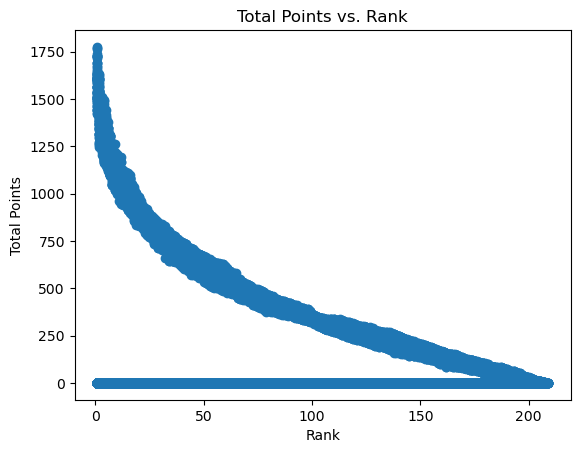

In [9]:
# Scatter plot of total points vs. rank
plt.scatter(df['rank'], df['total_points'])
plt.xlabel('Rank')
plt.ylabel('Total Points')
plt.title('Total Points vs. Rank')
plt.show()

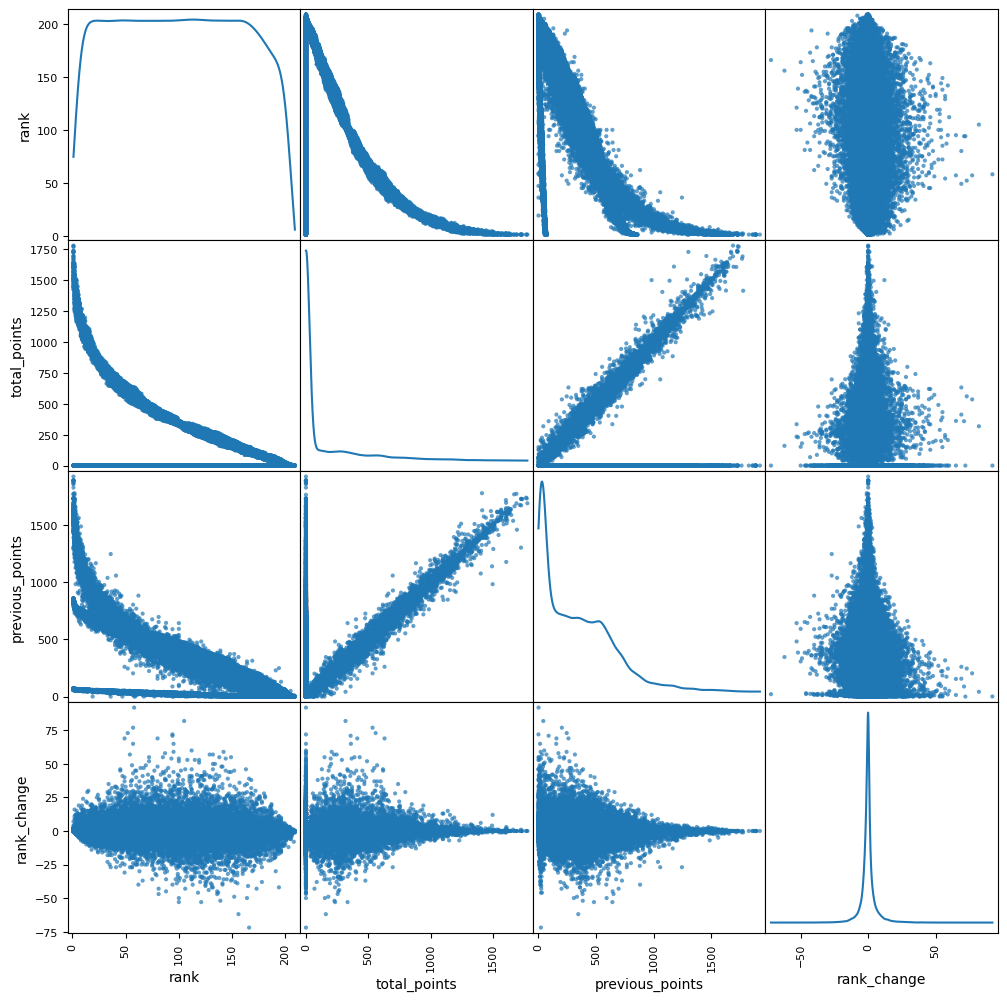

In [10]:
# Select columns for scatter matrix plot
columns = ['rank', 'total_points', 'previous_points', 'rank_change']

# Create scatter matrix plot
pd.plotting.scatter_matrix(df[columns], alpha=0.7, figsize=(12, 12), diagonal='kde')
plt.savefig('ScatterMatrix-FIFARankings.png')
plt.show()

# <font color=Black> analysis of the data statistics</font>

* Using describe(), I could get a statistical description of the dataset. We can see the mean of total points is 122.
* The scatter "Total Points vs. Rank" shows how rare it is to have more than 1500 points.
* The matrix plot shows different correlations. Teams with many points are most likely to have a minor rank change, etc...

---


### The preprocessing techniques applied to the data

In [11]:
# Group the DataFrame by country and count the number of times each country appears in the first rank
first_ranks = df[df['rank'] == 1].groupby('country_full').count()['rank']

# Get the country with the most first ranks
most_first_ranks = first_ranks.idxmax()

# Print the result
print(f"The country with the most first ranks is {most_first_ranks}, with {first_ranks[most_first_ranks]} first ranks.")


The country with the most first ranks is Brazil, with 143 first ranks.


In [12]:
# Group the DataFrame by country and count the number of times each country appears in the first place
first_ranks = df[df['rank'] == 1].groupby('country_full').count()['rank']

# Sort the resulting Series object in descending order and select the top 8 rows
top_eight_first_ranked_countries = first_ranks.sort_values(ascending=False).head(8)

# Print the result
print("The top eight countries with the most first place rankings are:")
print(top_eight_first_ranked_countries)

The top eight countries with the most first place rankings are:
country_full
Brazil         143
Spain           64
Germany         28
Argentina       26
France          13
Italy            6
Belgium          5
Netherlands      1
Name: rank, dtype: int64


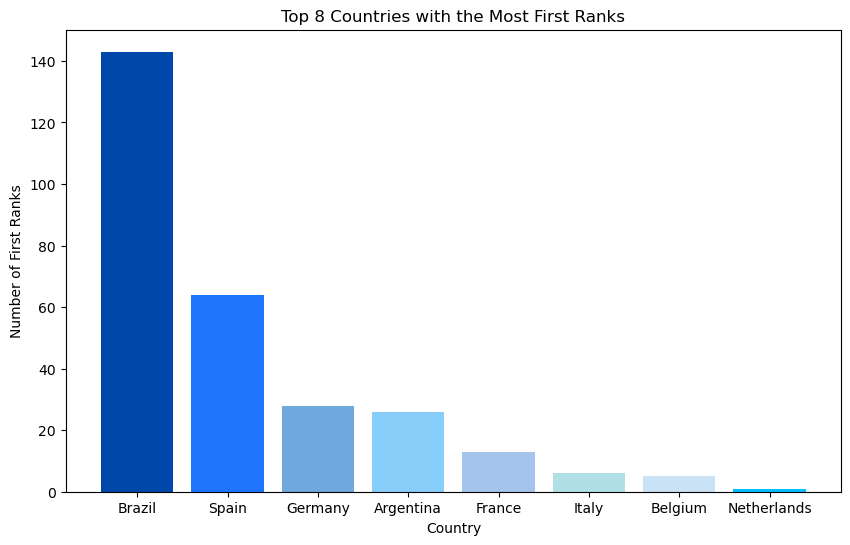

In [24]:
# colors for the bars
colors = ['#0047AB', '#1F75FE', '#6FA8DC', '#87CEFA', '#A4C3ED', '#B0E0E6', '#C9E2F5', '#00BFFF']
# Create a bar plot with the top eight countries and their first ranks
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(top_eight_first_ranked_countries.index, top_eight_first_ranked_countries, color=colors)

# Set the labels for the x and y axes
ax.set_xlabel('Country')
ax.set_ylabel('Number of First Ranks')

# Set the title for the plot
ax.set_title('Top 8 Countries with the Most First Ranks')

# Show the plot
plt.show()

In [27]:
# Convert the rank_date column to datetime format
df['rank_date'] = pd.to_datetime(df['rank_date'])

# Filter the DataFrame to include only the rows with a rank date since 2010
df_since_2010 = df[df['rank_date'].dt.year >= 2010]

# Group the filtered DataFrame by country and count the number of times each country appears in the first place
first_ranks_since_2010 = df_since_2010[df_since_2010['rank'] == 1].groupby('country_full').count()['rank']

# Sort the resulting Series object in descending order and select the top eight rows
top_eight_first_ranked_countries_since_2010 = first_ranks_since_2010.sort_values(ascending=False).head(10)

# Print the result
print("The top eight countries with the most first place rankings since 2010 are:")
print(top_eight_first_ranked_countries_since_2010)

The top eight countries with the most first place rankings since 2010 are:
country_full
Spain          50
Germany        23
Argentina      16
Brazil          6
Belgium         5
Netherlands     1
Name: rank, dtype: int64


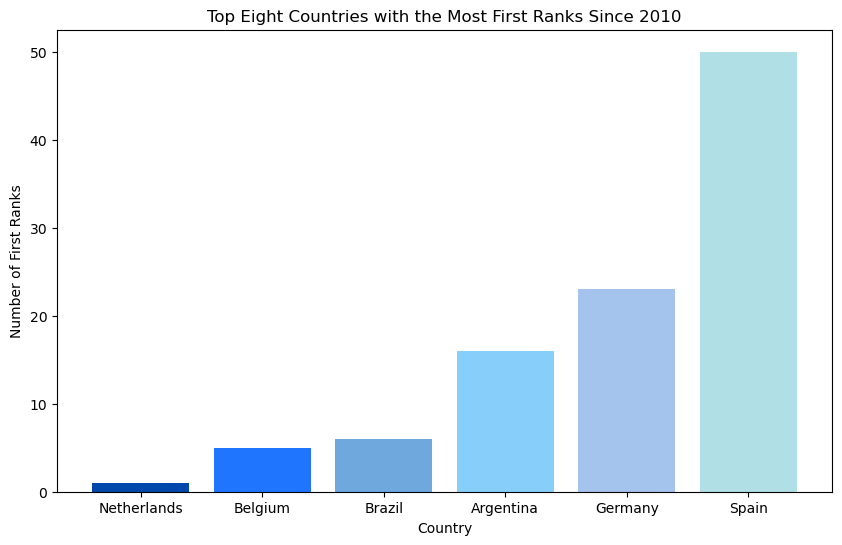

In [75]:
# Set the size of the figure
plt.figure(figsize=(10, 6))
# colors for the bars
colors = ['#0047AB', '#1F75FE', '#6FA8DC', '#87CEFA', '#A4C3ED', '#B0E0E6', '#C9E2F5', '#00BFFF']
# sort values 
first_ranks_since_2010 = df_since_2010[df_since_2010['rank'] == 1].groupby('country_full').count()['rank'].sort_values()
# Create a bar plot with the top eight countries and their first ranks
plt.bar(first_ranks_since_2010.index, first_ranks_since_2010, color=colors)
# Set the labels for the x and y axes
plt.xlabel('Country')
plt.ylabel('Number of First Ranks')
# Set the title for the plot
plt.title('Top Eight Countries with the Most First Ranks Since 2010')
# Show the plot
plt.show()


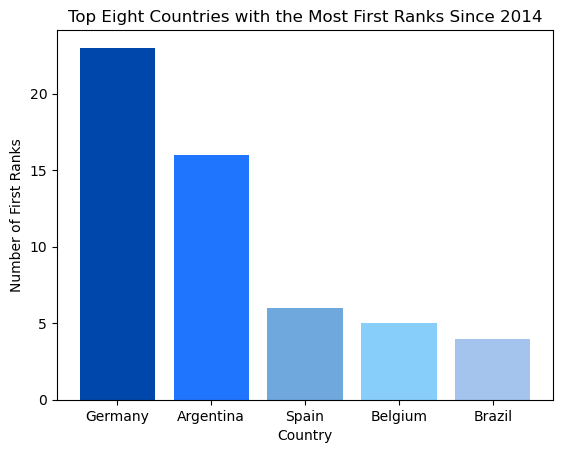

In [62]:
# colors for the bars
colors = ['#0047AB', '#1F75FE', '#6FA8DC', '#87CEFA', '#A4C3ED', '#B0E0E6', '#C9E2F5', '#00BFFF']
# Filter the DataFrame to include only the rows with a rank date since 2014
df_since_2014 = df[df['rank_date'].dt.year >= 2014]
# Group the DataFrame by country and count the number of times each country appears in the first place
first_ranks_since_2014 = df_since_2014[df_since_2014['rank'] == 1].groupby('country_full').count()['rank']
# Sort the resulting Series object in descending order and select the top eight rows
top_eight_first_ranked_countries_since_2014 = first_ranks_since_2014.sort_values(ascending=False).head(8)
# Create a bar plot with the top eight countries and their first ranks
plt.bar(top_eight_first_ranked_countries_since_2014.index, top_eight_first_ranked_countries_since_2014, color=colors)
# Set the labels for the x and y axes
plt.xlabel('Country')
plt.ylabel('Number of First Ranks')
# Set the title for the plot
plt.title('Top Eight Countries with the Most First Ranks Since 2014')
# Show the plot
plt.show()


### That analysis is a narrow and simplified analysis to give us a picture of the favorite team to win the next big tournament. We have 8 teams that have been ranked first, and we can see the trend of the past 40 years and the past 8 years. 

---

## My deeper analysis to scale and give better predictions for the next few years.  

###  Some of the teams will have NaN values because did have not been ranking first in each phase. This will help us to reduce the teams to the top five teams. 

#### I am going to scale and normalize the data in order to have a better accurate answer

In [66]:
# Define the weights for the two columns
weight_most_first_ranks = 0.2
weight_first_ranks_since_2010 = 0.3
weight_first_ranks_since_2014 = 0.5

# Calculate the scaled rank for each country
scale_rank = (top_eight_first_ranked_countries * weight_most_first_ranks) + (first_ranks_since_2010 * weight_first_ranks_since_2010)+(first_ranks_since_2014*weight_first_ranks_since_2014)
scale_rank

country_full
Argentina      18.9
Belgium         6.2
Brazil         36.3
France          NaN
Germany        26.4
Italy           NaN
Netherlands     NaN
Spain          16.7
Uruguay         NaN
Name: rank, dtype: float64

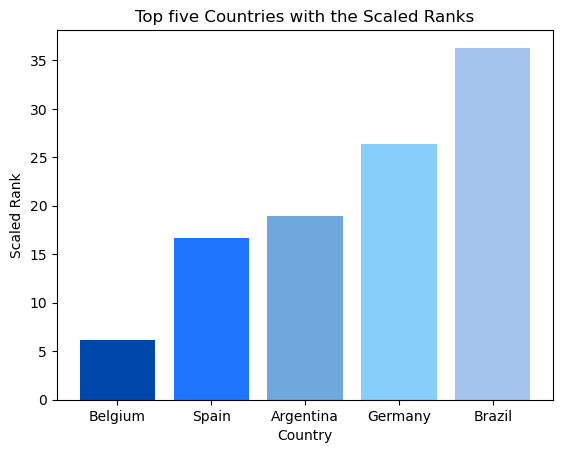

In [79]:
# Define the colors for the bars
colors = ['#0047AB', '#1F75FE', '#6FA8DC', '#87CEFA', '#A4C3ED', '#B0E0E6', '#C9E2F5', '#00BFFF']
# Filter out NaN values
scale_rank = scale_rank.dropna().sort_values(ascending=True)

# Create a bar plot with the scaled rank for each country
plt.bar(scale_rank.index, scale_rank, color=colors)

# Set the labels for the x and y axes
plt.xlabel('Country')
plt.ylabel('Scaled Rank')

# Set the title for the plot
plt.title('Top five Countries with the Scaled Ranks')

# Show the plot
plt.show()


---

### The questions you asked about the data to get answers by visualization and whether thevisualization was helpful in answering the questions (use figure numbers to reference the plots):


The FIFA men's international soccer rankings dataset is a valuable resource for soccer enthusiasts, researchers, and data scientists. The dataset helped to identify the most consistent national teams. Furthermore, the dataset was used to predict the top 5 teams that could win the World Cup of 2018, and the results were similar to the predictions of the gambling industry(see picture below.) The visualizations helped present the trends and patterns in the data and identify the factors contributing to a team's success. In addition, the bar charts provided clear and concise information that was easy to understand and interpret. 

## Gambling industry prediction:

![gambling_sites_TABLE](gamblingsites.png)

---

## Our prediction:

In [105]:
#  sort the values in ascending order
scale_rank = scale_rank.dropna().sort_values(ascending=False)

# Convert the scaled rank to percentage
scale_rank_percentage = scale_rank * 100 /104.5

# Create a DataFrame from the scale_rank data
df = pd.DataFrame({'Country': scale_rank.index, 'Scaled Rank': scale_rank_percentage.values})

# Set the index of the DataFrame to start from 1
df.index = df.index + 1

# Format the Scaled Rank column as percentage
df['Scaled Rank'] = df['Scaled Rank'].apply(lambda x: '{:.2f}%'.format(x))

# Display the DataFrame as a table
display(df)


,Country,Scaled Rank
1,Brazil,34.74%
2,Germany,25.26%
3,Argentina,18.09%
4,Spain,15.98%
5,Belgium,5.93%


#### As we can see, out of the top 6 gambling sites, we got five notional teams right.

---

### Any interesting knowledge discovered or information easily explained/conveyed using the visuals

The bar chart 'Top 8 Countries with the First Ranks' shows how big the gap is between Brazil and the rest of the world. I was not aware of this, and it was a surprise. The scaling technique helped balance the top five finalists because I gave more weight to the recent years before the tournament. I read a few articles on how I should divide the weight, and surprisingly we got almost the same ratio of the biggest gambling sites that pay a lot of attention to this data and analyze it as it is best. 

---

###  describe, discuss, and conclude your results of the study:


The FIFA men's international soccer rankings dataset and using several visualization tools are valuable resources for soccer enthusiasts, researchers, and data scientists. For example, our analysis identified the most consistent national teams and predicted the top 5 national teams that could win the World Cup of 2018. Nevertheless, our results were significantly smaller than the predictions of the gambling industry.
The 'Top 8 Countries with the First Ranks' bar chart shows Brazil is the most dominant team in the world, with a considerable gap between them and the other teams. We also found that the scaling technique helped balance the top five finalists, with more weight given to the recent years before the tournament.
The scatter plot 'Total Points vs. Rank' helped us visualize how rare it is to have more than 1500 points, which is an interesting discovery. The matrix plot showed different correlations, highlighting that teams with many points likely have a minor rank change.
In general, the visualizations helped us effectively present the trends and patterns in the data and identify the factors contributing to a team's success. In addition, the bar charts provided clear and concise information that was easy to understand and interpret.
In conclusion, as data analysts, we recommend using the FIFA men's international soccer rankings dataset to predict team performance and improve team strategy. At the same time, our results were smaller than the predictions of the gambling industry.